#Import Dataset

In [56]:
!pip install category_encoders

In [57]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

#Load Dataset

In [58]:
df=pd.read_csv("ukmkuliner.csv",header=1)
df

,Usia,Jenis Kelamin,Pendidikan Terakhir,Provinsi,Kab/Kota,Kecamatan,"Desa/Kel, RT, RW",Nama Jalan,Nama Usaha,Tanggal Pendirian Usaha,...,Tujuan Pemasaran,Status Kepemilkan Tanah/Bangunan,Sarana Media Elektronik,Modal Bantuan Pemerintah,Pinjaman Kredit Usaha Rakyat,Omset per-Tahun,Kepemilikan Asuransi Kesehatan,Laki-laki,Perempuan,Rerata Usia Pekerja
0,41,P,SMA,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,TEGALREJO,"KARANGAWARU, 21, 6",BLUNYAHREJO TR.II/839,NASYWA SNACK,24 Juli 2012,...,Dalam wilayah DIY,Lainnya,"WhatsApp, Facebook",-,-,Kurang dari 10 juta,-,0,0,-
1,53,P,SMA,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,DANUREJAN,"TEGALPANGGUNG, 26, 5",TUKANGAN DN. 2/506,TUNGKU MA ENDANG,16 Februari 2016,...,"Dalam wilayah Kota Yogyakarta, Dalam wilayah D...",Milik sendiri,"WhatsApp, Instagram",Pemkot Yogyakarta,-,Kurang dari 10 juta,BPJS,0,2,35-50 tahun
2,45,P,0,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,TEGALREJO,"KRICAK, 38, 8",KRICAK KIDUL TR.I/1130,JP CATERING,07 Januari 2022,...,Dalam wilayah Kota Yogyakarta,Lainnya,WhatsApp,Pemkot Yogyakarta,"Bank, Pemerintah",10 juta s/d 25 juta,-,1,1,35-50 tahun
3,40,L,SMA,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,UMBULHARJO,"GIWANGAN, 12, 4",TEGAL TURI GIWANGAN UH 7/137,JUALAN ES KELAPA MUDA,22 Juni 2020,...,Dalam wilayah Kota Yogyakarta,Sewa,WhatsApp,Pemkot Yogyakarta,Lainnya,10 juta s/d 25 juta,BPJS,1,0,25-35 tahun
4,-,-,SMP,DI. YOGYAKARTA,KAB. GUNUNGKIDUL,KARANGMOJO,"KARANGMOJO, -, -",SUMBEREJO,ANGKRINGAN,04 Februari 2005,...,Dalam wilayah Kota Yogyakarta,Lainnya,Lainnya,Pemerintah Pusat,Lainnya,Kurang dari 10 juta,BPJS,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,46,L,-,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,GONDOKUSUMAN,"KLITREN, 33, 8",IROMEJAN GK. 3 / 748,SEAFOOD BU PUJI,20 Agustus 1990,...,Dalam wilayah Kota Yogyakarta,Lainnya,WhatsApp,-,-,Kurang dari 10 juta,-,2,0,25-35 tahun
1332,43,L,SMA,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,DANUREJAN,"BAUSASRAN, 16, 5",LEMPUYANGAN DN.3/349,THE LEGEND DONUT,26 Oktober 2011,...,Dalam wilayah Kota Yogyakarta,Milik sendiri,WhatsApp,-,-,10 juta s/d 25 juta,-,1,0,25-35 tahun
1333,47,P,S1,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,TEGALREJO,"KARANGAWARU, 44, 12",BANGIREJO KW I/99,DAPUR NUGGETQU,09 September 2020,...,Dalam wilayah DIY,Milik sendiri,"WhatsApp, Facebook, Twitter, Instagram",-,-,Kurang dari 10 juta,BPJS,0,0,35-50 tahun
1334,36,L,SMK,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,WIROBRAJAN,"PATANGPULUHAN, 17, 3",PATANGPULUHAN WB 3/400,YUYUN ES TEBU,07 September 2020,...,Dalam wilayah Kota Yogyakarta,Lainnya,-,-,Lainnya,Kurang dari 10 juta,BPJS,1,0,25-35 tahun


# Preprocessing & EDA

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Usia                              1336 non-null   object
 1   Jenis Kelamin                     1336 non-null   object
 2   Pendidikan Terakhir               1336 non-null   object
 3   Provinsi                          1335 non-null   object
 4   Kab/Kota                          1335 non-null   object
 5   Kecamatan                         1335 non-null   object
 6   Desa/Kel, RT, RW                  1336 non-null   object
 7   Nama Jalan                        1335 non-null   object
 8   Nama Usaha                        1336 non-null   object
 9   Tanggal Pendirian Usaha           1336 non-null   object
 10  Provinsi.1                        1336 non-null   object
 11  Kab/Kota.1                        1336 non-null   object
 12  Kecamatan.1         

In [60]:
df.isnull().sum()

,0
Usia,0
Jenis Kelamin,0
Pendidikan Terakhir,0
Provinsi,1
Kab/Kota,1
Kecamatan,1
"Desa/Kel, RT, RW",0
Nama Jalan,1
Nama Usaha,0
Tanggal Pendirian Usaha,0


In [61]:
# Memilih kolom yang relevan untuk clustering
selected_columns = [
  "Omset per-Tahun",
    "Pendidikan Terakhir",
    "Status Kepemilkan Tanah/Bangunan",
    "Kepemilikan Asuransi Kesehatan",
    "Modal Bantuan Pemerintah",
    "Jenis Kelamin"
]
df_selected = df[selected_columns]

## Jenis Kelamin

In [62]:
df["Jenis Kelamin"].value_counts()

,count
Jenis Kelamin,
P,952
L,330
-,54


In [63]:
Kelamin = {"-":2,"P": 1, "L": 0}
df_selected["Jenis Kelamin"] = df_selected["Jenis Kelamin"].map(Kelamin)

/tmp/ipython-input-215224243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Jenis Kelamin"] = df_selected["Jenis Kelamin"].map(Kelamin)


## Pendidikan Terakhir

In [64]:
df["Pendidikan Terakhir"].value_counts()

,count
Pendidikan Terakhir,
SMA,377
SMK,250
S1,194
-,172
SMP,137
SD,88
D3,78
D1,9
D2,9


In [65]:
le = LabelEncoder()
df_selected["Pendidikan Terakhir"] = le.fit_transform(df_selected["Pendidikan Terakhir"] .astype(str))  # Pastikan tipe data string agar bisa dikodekan


/tmp/ipython-input-2091103457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Pendidikan Terakhir"] = le.fit_transform(df_selected["Pendidikan Terakhir"] .astype(str))  # Pastikan tipe data string agar bisa dikodekan


## Status Kepemilikan tanah

In [66]:
le = LabelEncoder()
df_selected["Status Kepemilkan Tanah/Bangunan"] = le.fit_transform(df_selected["Status Kepemilkan Tanah/Bangunan"].astype(str))  # Pastikan tipe data string agar bisa dikodekan


/tmp/ipython-input-2495442931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Status Kepemilkan Tanah/Bangunan"] = le.fit_transform(df_selected["Status Kepemilkan Tanah/Bangunan"].astype(str))  # Pastikan tipe data string agar bisa dikodekan


In [67]:
df["Status Kepemilkan Tanah/Bangunan"].value_counts()

,count
Status Kepemilkan Tanah/Bangunan,
Milik sendiri,693
Lainnya,314
Sewa,247
Magersari (adat),82


##Sarana Media Eletronik

In [68]:
df["Sarana Media Elektronik"].value_counts()

,count
Sarana Media Elektronik,
WhatsApp,465
"WhatsApp, Facebook, Instagram",132
"WhatsApp, Facebook",109
"WhatsApp, Instagram",74
Lainnya,70
...,...
"WhatsApp, Facebook, Twitter, Instagram, Tokopedia, Shopee, Grab, Lainnya",1
"WhatsApp, Facebook, Gojek, Lainnya",1
"WhatsApp, Facebook, Instagram, Tokopedia, Gojek, Grab, Lainnya",1


In [69]:
# 3️⃣ Binary Encoding untuk 'Media Elektronik'
encoder = ce.BinaryEncoder(cols=["Sarana Media Elektronik"])
df_encoded = encoder.fit_transform(df[["Sarana Media Elektronik"]])


##Omset Pertahun

In [70]:
df["Omset per-Tahun"].value_counts()

,count
Omset per-Tahun,
Kurang dari 10 juta,860
10 juta s/d 25 juta,293
25 juta s/d 40 juta,73
40 juta s/d 55 juta,29
100 juta s/d 120 juta,19
Lebih dari 150 juta,16
85 juta s/d 100 juta,15
55 juta s/d 70 juta,15
70 juta s/d 85 juta,8


In [71]:
omset_mapping = {
    "Kurang dari 10 juta": 5_000_000,   # Ambil rata-rata (0 - 10 juta)
    "10 juta s/d 25 juta": 17_500_000,  # (10+25)/2 juta
    "25 juta s/d 40 juta": 32_500_000,  # (25+40)/2 juta
    "40 juta s/d 55 juta": 47_500_000,  # (40+55)/2 juta
    "55 juta s/d 70 juta": 62_500_000,  # (55+70)/2 juta
    "70 juta s/d 85 juta": 77_500_000,  # (70+85)/2 juta
    "85 juta s/d 100 juta": 92_500_000, # (85+100)/2 juta
    "100 juta s/d 120 juta": 110_000_000, # (100+120)/2 juta
    "120 juta s/d 150 juta": 135_000_000, # (120+150)/2 juta
    "Lebih dari 150 juta": 175_000_000  # Asumsi diambil 175 juta
}
df_selected["Omset per-Tahun"] = df_selected["Omset per-Tahun"].map(omset_mapping)

/tmp/ipython-input-3659462348.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Omset per-Tahun"] = df_selected["Omset per-Tahun"].map(omset_mapping)


##Kepemilikan Asuransi

In [72]:
df["Kepemilikan Asuransi Kesehatan"].value_counts()

,count
Kepemilikan Asuransi Kesehatan,
BPJS,920
-,404
Asuransi Swasta,8
"BPJS, Asuransi Swasta",4


In [73]:
le = LabelEncoder()
df_selected["Kepemilikan Asuransi Kesehatan"] = le.fit_transform(df_selected["Kepemilikan Asuransi Kesehatan"].astype(str))  # Pastikan tipe data string agar bisa dikodekan


/tmp/ipython-input-2372082381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Kepemilikan Asuransi Kesehatan"] = le.fit_transform(df_selected["Kepemilikan Asuransi Kesehatan"].astype(str))  # Pastikan tipe data string agar bisa dikodekan


##Modal Bantuan Pemerintah

In [74]:
df["Modal Bantuan Pemerintah"].value_counts()

,count
Modal Bantuan Pemerintah,
-,909
Pemerintah Pusat,255
Pemkot Yogyakarta,140
Pemda DIY,32


In [75]:
le = LabelEncoder()
df_selected["Modal Bantuan Pemerintah"] = le.fit_transform(df_selected["Modal Bantuan Pemerintah"].astype(str))  # Pastikan tipe data string agar bisa dikodekan


/tmp/ipython-input-1542393778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Modal Bantuan Pemerintah"] = le.fit_transform(df_selected["Modal Bantuan Pemerintah"].astype(str))  # Pastikan tipe data string agar bisa dikodekan


#Hasil Preprocessing

In [76]:
df_encoded.value_counts()

Sarana Media Elektronik_0  Sarana Media Elektronik_1  Sarana Media Elektronik_2  Sarana Media Elektronik_3  Sarana Media Elektronik_4  Sarana Media Elektronik_5  Sarana Media Elektronik_6
0                          0                          0                          0                          0                          1                          1                            465
                                                                                 1                          0                          0                          1                            132
                                                                                 0                          0                          0                          1                            109
                                                                                                                                       1                          0                             74
                                                                                                            1                          0                          0                             70
                                                                                                                                                                                              ... 
1                          0                          1                          0                          1                          0                          1                              1
                                                                                                                                       1                          1                              1
                                                                                                                                                                  0                              1
                                                                                 1                          0                          1                          0                              1
                                                                                                                                                                  1                              1
Name: count, Length: 91, dtype: int64

In [77]:
df_encoded

,Sarana Media Elektronik_0,Sarana Media Elektronik_1,Sarana Media Elektronik_2,Sarana Media Elektronik_3,Sarana Media Elektronik_4,Sarana Media Elektronik_5,Sarana Media Elektronik_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1
3,0,0,0,0,0,1,1
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
1331,0,0,0,0,0,1,1
1332,0,0,0,0,0,1,1
1333,0,0,1,1,0,1,0
1334,0,0,0,1,0,1,1


In [78]:
df_selected

,Omset per-Tahun,Pendidikan Terakhir,Status Kepemilkan Tanah/Bangunan,Kepemilikan Asuransi Kesehatan,Modal Bantuan Pemerintah,Jenis Kelamin
0,5000000,13,0,0,0,1
1,5000000,13,2,2,3,1
2,17500000,1,0,0,3,1
3,17500000,13,3,2,3,0
4,5000000,15,0,2,2,2
...,...,...,...,...,...,...
1331,5000000,0,0,0,0,0
1332,17500000,13,2,0,0,0
1333,5000000,9,2,2,0,1
1334,5000000,14,0,2,0,0


In [79]:
df_selected.describe(include="all")

,Omset per-Tahun,Pendidikan Terakhir,Status Kepemilkan Tanah/Bangunan,Kepemilikan Asuransi Kesehatan,Modal Bantuan Pemerintah,Jenis Kelamin
count,1.336000e+03,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,1.653630e+07,10.370509,1.653443,1.392216,0.720060,0.793413
std,2.721984e+07,4.797596,1.032993,0.921844,1.101345,0.494904
min,5.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,9.000000,1.000000,0.000000,0.000000,1.000000
50%,5.000000e+06,13.000000,2.000000,2.000000,0.000000,1.000000
75%,1.750000e+07,14.000000,2.000000,2.000000,2.000000,1.000000
max,1.750000e+08,16.000000,3.000000,3.000000,3.000000,2.000000


In [80]:
df

,Usia,Jenis Kelamin,Pendidikan Terakhir,Provinsi,Kab/Kota,Kecamatan,"Desa/Kel, RT, RW",Nama Jalan,Nama Usaha,Tanggal Pendirian Usaha,...,Tujuan Pemasaran,Status Kepemilkan Tanah/Bangunan,Sarana Media Elektronik,Modal Bantuan Pemerintah,Pinjaman Kredit Usaha Rakyat,Omset per-Tahun,Kepemilikan Asuransi Kesehatan,Laki-laki,Perempuan,Rerata Usia Pekerja
0,41,P,SMA,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,TEGALREJO,"KARANGAWARU, 21, 6",BLUNYAHREJO TR.II/839,NASYWA SNACK,24 Juli 2012,...,Dalam wilayah DIY,Lainnya,"WhatsApp, Facebook",-,-,Kurang dari 10 juta,-,0,0,-
1,53,P,SMA,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,DANUREJAN,"TEGALPANGGUNG, 26, 5",TUKANGAN DN. 2/506,TUNGKU MA ENDANG,16 Februari 2016,...,"Dalam wilayah Kota Yogyakarta, Dalam wilayah D...",Milik sendiri,"WhatsApp, Instagram",Pemkot Yogyakarta,-,Kurang dari 10 juta,BPJS,0,2,35-50 tahun
2,45,P,0,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,TEGALREJO,"KRICAK, 38, 8",KRICAK KIDUL TR.I/1130,JP CATERING,07 Januari 2022,...,Dalam wilayah Kota Yogyakarta,Lainnya,WhatsApp,Pemkot Yogyakarta,"Bank, Pemerintah",10 juta s/d 25 juta,-,1,1,35-50 tahun
3,40,L,SMA,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,UMBULHARJO,"GIWANGAN, 12, 4",TEGAL TURI GIWANGAN UH 7/137,JUALAN ES KELAPA MUDA,22 Juni 2020,...,Dalam wilayah Kota Yogyakarta,Sewa,WhatsApp,Pemkot Yogyakarta,Lainnya,10 juta s/d 25 juta,BPJS,1,0,25-35 tahun
4,-,-,SMP,DI. YOGYAKARTA,KAB. GUNUNGKIDUL,KARANGMOJO,"KARANGMOJO, -, -",SUMBEREJO,ANGKRINGAN,04 Februari 2005,...,Dalam wilayah Kota Yogyakarta,Lainnya,Lainnya,Pemerintah Pusat,Lainnya,Kurang dari 10 juta,BPJS,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,46,L,-,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,GONDOKUSUMAN,"KLITREN, 33, 8",IROMEJAN GK. 3 / 748,SEAFOOD BU PUJI,20 Agustus 1990,...,Dalam wilayah Kota Yogyakarta,Lainnya,WhatsApp,-,-,Kurang dari 10 juta,-,2,0,25-35 tahun
1332,43,L,SMA,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,DANUREJAN,"BAUSASRAN, 16, 5",LEMPUYANGAN DN.3/349,THE LEGEND DONUT,26 Oktober 2011,...,Dalam wilayah Kota Yogyakarta,Milik sendiri,WhatsApp,-,-,10 juta s/d 25 juta,-,1,0,25-35 tahun
1333,47,P,S1,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,TEGALREJO,"KARANGAWARU, 44, 12",BANGIREJO KW I/99,DAPUR NUGGETQU,09 September 2020,...,Dalam wilayah DIY,Milik sendiri,"WhatsApp, Facebook, Twitter, Instagram",-,-,Kurang dari 10 juta,BPJS,0,0,35-50 tahun
1334,36,L,SMK,DAERAH ISTIMEWA YOGYAKARTA,KOTA YOGYAKARTA,WIROBRAJAN,"PATANGPULUHAN, 17, 3",PATANGPULUHAN WB 3/400,YUYUN ES TEBU,07 September 2020,...,Dalam wilayah Kota Yogyakarta,Lainnya,-,-,Lainnya,Kurang dari 10 juta,BPJS,1,0,25-35 tahun


#Penggabungan data

In [81]:
df_final = pd.concat([df_selected, df_encoded], axis=1)
df_final

,Omset per-Tahun,Pendidikan Terakhir,Status Kepemilkan Tanah/Bangunan,Kepemilikan Asuransi Kesehatan,Modal Bantuan Pemerintah,Jenis Kelamin,Sarana Media Elektronik_0,Sarana Media Elektronik_1,Sarana Media Elektronik_2,Sarana Media Elektronik_3,Sarana Media Elektronik_4,Sarana Media Elektronik_5,Sarana Media Elektronik_6
0,5000000,13,0,0,0,1,0,0,0,0,0,0,1
1,5000000,13,2,2,3,1,0,0,0,0,0,1,0
2,17500000,1,0,0,3,1,0,0,0,0,0,1,1
3,17500000,13,3,2,3,0,0,0,0,0,0,1,1
4,5000000,15,0,2,2,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,5000000,0,0,0,0,0,0,0,0,0,0,1,1
1332,17500000,13,2,0,0,0,0,0,0,0,0,1,1
1333,5000000,9,2,2,0,1,0,0,1,1,0,1,0
1334,5000000,14,0,2,0,0,0,0,0,1,0,1,1


#K-MEANS&ACO (n_cluster = 2 )

In [82]:
# Jalankan K-Means biasa dan simpan centroidnya
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_final)
labels = kmeans.labels_
silhouette_kmeans = silhouette_score(df_final, kmeans.labels_)
kmeans_centroids = kmeans.cluster_centers_
kmeans_centroids


array([[1.05000000e+07, 1.05545817e+01, 1.63107570e+00, 1.39043825e+00,
        7.35458167e-01, 7.95219124e-01, 3.18725100e-02, 6.69322709e-02,
        1.76095618e-01, 2.74103586e-01, 2.77290837e-01, 6.19920319e-01,
        7.35458167e-01],
       [1.10061728e+08, 7.51851852e+00, 2.00000000e+00, 1.41975309e+00,
        4.81481481e-01, 7.65432099e-01, 9.87654321e-02, 1.60493827e-01,
        2.83950617e-01, 4.44444444e-01, 4.07407407e-01, 5.06172840e-01,
        6.41975309e-01]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


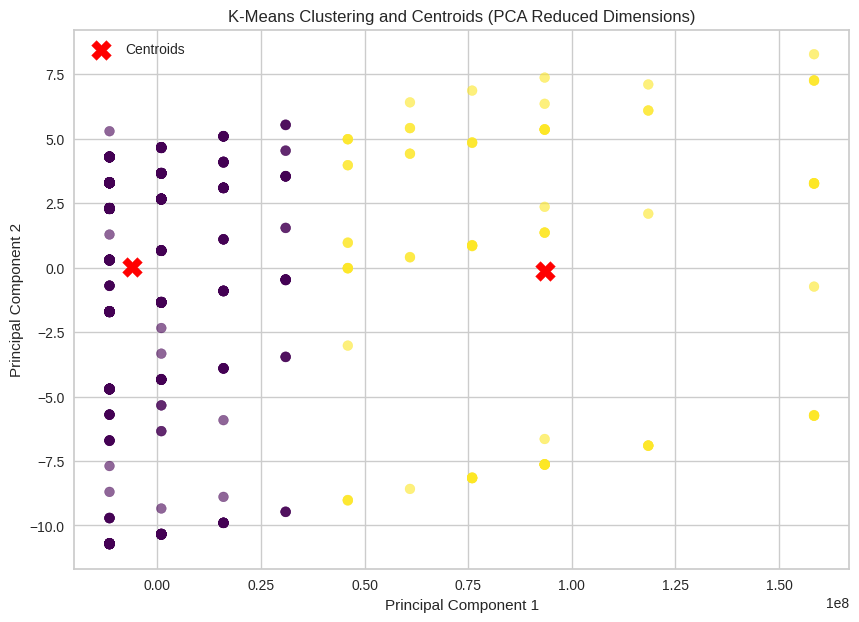

In [83]:


import matplotlib.pyplot as plt
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_final)

# Transform centroids using the same PCA model
pca_centroids = pca.transform(kmeans_centroids)

# Plot the data points
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)

# Plot the centroids
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], c='red', s=200, alpha=1, marker='X', label='Centroids')

plt.title('K-Means Clustering and Centroids (PCA Reduced Dimensions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
class AntColonyOptimization:
    def __init__(self, data, n_clusters=2, n_ants=50, n_iterations=100,
                 alpha=1, beta=2, evaporation_rate=0.8):
        self.data = data
        self.n_clusters = n_clusters
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha  # pengaruh pheromone
        self.beta = beta    # pengaruh heuristic (jarak)
        self.evaporation_rate = evaporation_rate
        self.pheromone = np.ones((len(data), n_clusters))

    # ==========================================================
    # 🔹 Fungsi utama optimasi
    # ==========================================================
    def optimize(self):
        best_centroids = None
        best_score = -1

        for iteration in range(self.n_iterations):
            all_centroids = []
            all_scores = []

            # 🐜 Tiap semut membentuk solusi sendiri
            for _ in range(self.n_ants):
                centroids = self.select_centroids_probabilistic()
                score = self.evaluate_centroids(centroids)
                all_centroids.append(centroids)
                all_scores.append(score)

                if score > best_score:
                    best_centroids = centroids
                    best_score = score

            # 💧 Update pheromone berdasarkan semua semut
            self.update_pheromone_batch(all_centroids, all_scores)

            # (Opsional) tampilkan progres di notebook
            if (iteration + 1) % 10 == 0:
                print(f"Iterasi {iteration+1}/{self.n_iterations} | Skor terbaik: {best_score:.4f}")

        print(f"✅ Optimasi selesai! Silhouette terbaik: {best_score:.4f}")
        return best_centroids

    # ==========================================================
    # 🔹 Pemilihan centroid secara probabilistik (pheromone + jarak)
    # ==========================================================
    def select_centroids_probabilistic(self):
        centroids = []
        remaining_indices = list(range(len(self.data)))

        for cluster_idx in range(self.n_clusters):
            pheromone_values = self.pheromone[remaining_indices, cluster_idx]
            distances = np.ones(len(remaining_indices))

            # heuristic: titik yang lebih jauh punya peluang lebih besar
            if centroids:
                prev_centroids = np.array(centroids)
                distances = cdist(self.data.iloc[remaining_indices].values, prev_centroids).min(axis=1)
            heuristic = 1 / (distances + 1e-6)

            # probabilitas berdasarkan pheromone dan heuristic
            probs = (pheromone_values ** self.alpha) * (heuristic ** self.beta)
            probs /= probs.sum()

            chosen_index = np.random.choice(remaining_indices, p=probs)
            centroids.append(self.data.iloc[chosen_index].values)
            remaining_indices.remove(chosen_index)

        return np.array(centroids)

    # ==========================================================
    # 🔹 Evaluasi centroid menggunakan silhouette score
    # ==========================================================
    def evaluate_centroids(self, centroids):
        try:
            kmeans = KMeans(n_clusters=self.n_clusters, init=centroids, n_init=1,
                            max_iter=300, random_state=42)
            kmeans.fit(self.data)
            if len(set(kmeans.labels_)) > 1:
                return silhouette_score(self.data, kmeans.labels_)
            else:
                return -1
        except Exception:
            return -1

    # ==========================================================
    # 🔹 Update pheromone dari semua semut
    # ==========================================================
    def update_pheromone_batch(self, all_centroids, all_scores):
        # Evaporasi pheromone lama
        self.pheromone *= (1 - self.evaporation_rate)

        # Tambahkan pheromone baru berdasarkan skor semut
        for centroids, score in zip(all_centroids, all_scores):
            if score > 0:
                for i, centroid in enumerate(centroids):
                    distances = np.linalg.norm(self.data.values - centroid, axis=1)
                    delta_pheromone = score / (distances + 1e-6)
                    self.pheromone[:, i] += delta_pheromone

        # Hindari nilai ekstrem
        self.pheromone = np.clip(self.pheromone, 1e-6, None)
aco = AntColonyOptimization(df_final, n_clusters=2) # Ensure n_clusters is passed
optimal_centroids = aco.optimize()

Iterasi 10/100 | Skor terbaik: 0.8907
Iterasi 20/100 | Skor terbaik: 0.8907
Iterasi 30/100 | Skor terbaik: 0.8907
Iterasi 40/100 | Skor terbaik: 0.8907
Iterasi 50/100 | Skor terbaik: 0.8907
Iterasi 60/100 | Skor terbaik: 0.8907
Iterasi 70/100 | Skor terbaik: 0.8907
Iterasi 80/100 | Skor terbaik: 0.8907
Iterasi 90/100 | Skor terbaik: 0.8907
Iterasi 100/100 | Skor terbaik: 0.8907
✅ Optimasi selesai! Silhouette terbaik: 0.8907


In [85]:
kmeans_aco = KMeans(n_clusters=2, init=optimal_centroids, n_init=1, max_iter=300)
kmeans_aco.fit(df_final)
labels_aco = kmeans_aco.labels_
silhouette_aco = silhouette_score(df_final, kmeans_aco.labels_)
kmeans_aco_centroids = kmeans_aco.cluster_centers_
kmeans_aco_centroids

array([[1.11141732e+07, 1.05322835e+01, 1.63622047e+00, 1.39448819e+00,
        7.35433071e-01, 7.93700787e-01, 3.14960630e-02, 6.85039370e-02,
        1.77952756e-01, 2.73228346e-01, 2.77952756e-01, 6.22047244e-01,
        7.32283465e-01],
       [1.20871212e+08, 7.25757576e+00, 1.98484848e+00, 1.34848485e+00,
        4.24242424e-01, 7.87878788e-01, 1.21212121e-01, 1.51515152e-01,
        2.72727273e-01, 5.00000000e-01, 4.24242424e-01, 4.39393939e-01,
        6.81818182e-01]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


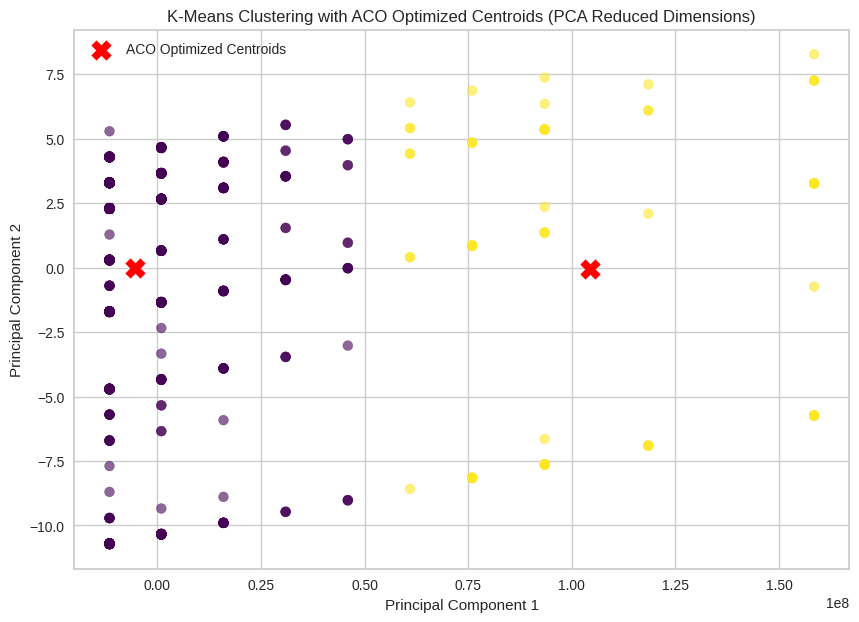

In [86]:


import matplotlib.pyplot as plt
# Transform the ACO optimized centroids using the same PCA model
pca_aco_centroids = pca.transform(kmeans_aco_centroids)

# Plot the data points
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_aco.labels_, cmap='viridis', s=50, alpha=0.6)

# Plot the ACO optimized centroids
plt.scatter(pca_aco_centroids[:, 0], pca_aco_centroids[:, 1], c='red', s=200, alpha=1, marker='X', label='ACO Optimized Centroids')

plt.title('K-Means Clustering with ACO Optimized Centroids (PCA Reduced Dimensions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
print(f"Silhouette Score (K-Means): {silhouette_kmeans:.4f}")
print(f"Silhouette Score (K-Means + ACO): {silhouette_aco:.4f}")

Silhouette Score (K-Means): 0.8840
Silhouette Score (K-Means + ACO): 0.8907


In [88]:
print("Silhouette Coefficient for K-Means:", silhouette_kmeans)
print("Silhouette Coefficient for K-Means + ACO:", silhouette_aco)

Silhouette Coefficient for K-Means: 0.8839776037118497
Silhouette Coefficient for K-Means + ACO: 0.8907375568966925


In [89]:
df_final['Cluster_ACO'] = labels_aco
df_final

,Omset per-Tahun,Pendidikan Terakhir,Status Kepemilkan Tanah/Bangunan,Kepemilikan Asuransi Kesehatan,Modal Bantuan Pemerintah,Jenis Kelamin,Sarana Media Elektronik_0,Sarana Media Elektronik_1,Sarana Media Elektronik_2,Sarana Media Elektronik_3,Sarana Media Elektronik_4,Sarana Media Elektronik_5,Sarana Media Elektronik_6,Cluster_ACO
0,5000000,13,0,0,0,1,0,0,0,0,0,0,1,0
1,5000000,13,2,2,3,1,0,0,0,0,0,1,0,0
2,17500000,1,0,0,3,1,0,0,0,0,0,1,1,0
3,17500000,13,3,2,3,0,0,0,0,0,0,1,1,0
4,5000000,15,0,2,2,2,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,5000000,0,0,0,0,0,0,0,0,0,0,1,1,0
1332,17500000,13,2,0,0,0,0,0,0,0,0,1,1,0
1333,5000000,9,2,2,0,1,0,0,1,1,0,1,0,0
1334,5000000,14,0,2,0,0,0,0,0,1,0,1,1,0


In [105]:
import pickle

# Save the ACO object to a pickle file
with open('aco_model.pkl', 'wb') as f:
    pickle.dump(aco, f)

print("ACO model saved to aco_model.pkl")

ACO model saved to aco_model.pkl


#K-MEANS&ACO (n_cluster = 3)

In [90]:
# Jalankan K-Means biasa dan simpan centroidnya
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_final)
labels = kmeans.labels_
silhouette_kmeans = silhouette_score(df_final, kmeans.labels_)
kmeans_centroids = kmeans.cluster_centers_
kmeans_centroids


array([[8.17649610e+06, 1.06166522e+01, 1.63573287e+00, 1.36860364e+00,
        7.29401561e-01, 8.02254987e-01, 3.03555941e-02, 6.67823070e-02,
        1.68256722e-01, 2.69731136e-01, 2.77536860e-01, 6.21856028e-01,
        7.45880312e-01, 1.22818422e-15],
       [1.26853448e+08, 6.75862069e+00, 1.89655172e+00, 1.32758621e+00,
        4.13793103e-01, 8.10344828e-01, 1.20689655e-01, 1.55172414e-01,
        2.75862069e-01, 4.65517241e-01, 4.31034483e-01, 4.82758621e-01,
        6.72413793e-01, 1.00000000e+00],
       [4.24600000e+07, 9.77600000e+00, 1.70400000e+00, 1.64000000e+00,
        7.76000000e-01, 7.04000000e-01, 4.80000000e-02, 8.80000000e-02,
        2.72000000e-01, 3.36000000e-01, 2.88000000e-01, 5.92000000e-01,
        6.08000000e-01, 6.40000000e-02]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


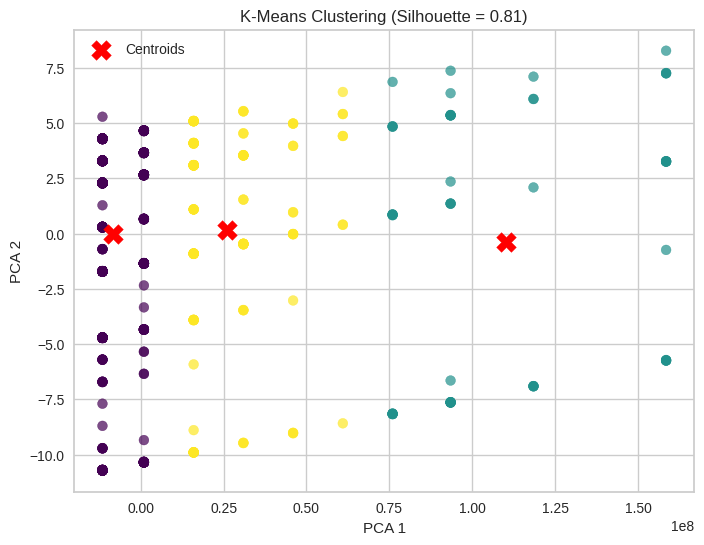

In [91]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

# --- Visualisasi cluster ---
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

# --- Visualisasi centroid (turunkan ke PCA juga) ---
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title(f"K-Means Clustering (Silhouette = {silhouette_kmeans:.2f})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [92]:
class AntColonyOptimization:
    def __init__(self, data, n_clusters=3, n_ants=50, n_iterations=100,
                 alpha=1, beta=2, evaporation_rate=0.8):
        self.data = data
        self.n_clusters = n_clusters
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha  # pengaruh pheromone
        self.beta = beta    # pengaruh heuristic (jarak)
        self.evaporation_rate = evaporation_rate
        self.pheromone = np.ones((len(data), n_clusters))

    # ==========================================================
    # 🔹 Fungsi utama optimasi
    # ==========================================================
    def optimize(self):
        best_centroids = None
        best_score = -1

        for iteration in range(self.n_iterations):
            all_centroids = []
            all_scores = []

            # 🐜 Tiap semut membentuk solusi sendiri
            for _ in range(self.n_ants):
                centroids = self.select_centroids_probabilistic()
                score = self.evaluate_centroids(centroids)
                all_centroids.append(centroids)
                all_scores.append(score)

                if score > best_score:
                    best_centroids = centroids
                    best_score = score

            # 💧 Update pheromone berdasarkan semua semut
            self.update_pheromone_batch(all_centroids, all_scores)

            # (Opsional) tampilkan progres di notebook
            if (iteration + 1) % 10 == 0:
                print(f"Iterasi {iteration+1}/{self.n_iterations} | Skor terbaik: {best_score:.4f}")

        print(f"✅ Optimasi selesai! Silhouette terbaik: {best_score:.4f}")
        return best_centroids

    # ==========================================================
    # 🔹 Pemilihan centroid secara probabilistik (pheromone + jarak)
    # ==========================================================
    def select_centroids_probabilistic(self):
        centroids = []
        remaining_indices = list(range(len(self.data)))

        for cluster_idx in range(self.n_clusters):
            pheromone_values = self.pheromone[remaining_indices, cluster_idx]
            distances = np.ones(len(remaining_indices))

            # heuristic: titik yang lebih jauh punya peluang lebih besar
            if centroids:
                prev_centroids = np.array(centroids)
                distances = cdist(self.data.iloc[remaining_indices].values, prev_centroids).min(axis=1)
            heuristic = 1 / (distances + 1e-6)

            # probabilitas berdasarkan pheromone dan heuristic
            probs = (pheromone_values ** self.alpha) * (heuristic ** self.beta)
            probs = probs + np.random.rand(len(probs)) * 0.01  # noise acak kecil
            probs /= probs.sum()

            chosen_index = np.random.choice(remaining_indices, p=probs)
            centroids.append(self.data.iloc[chosen_index].values)
            remaining_indices.remove(chosen_index)

        return np.array(centroids)

    # ==========================================================
    # 🔹 Evaluasi centroid menggunakan silhouette score
    # ==========================================================
    def evaluate_centroids(self, centroids):
        try:
            kmeans = KMeans(n_clusters=self.n_clusters, init=centroids, n_init=1,
                            max_iter=300)
            kmeans.fit(self.data)
            if len(set(kmeans.labels_)) > 1:
                return silhouette_score(self.data, kmeans.labels_)
            else:
                return -1
        except Exception:
            return -1

    # ==========================================================
    # 🔹 Update pheromone dari semua semut
    # ==========================================================
    def update_pheromone_batch(self, all_centroids, all_scores):
        # Evaporasi pheromone lama
        self.pheromone *= (1 - self.evaporation_rate)

        # Tambahkan pheromone baru berdasarkan skor semut
        for centroids, score in zip(all_centroids, all_scores):
            if score > 0:
                for i, centroid in enumerate(centroids):
                    distances = np.linalg.norm(self.data.values - centroid, axis=1)
                    delta_pheromone = score / (distances + 1e-6)
                    self.pheromone[:, i] += delta_pheromone

        # Hindari nilai ekstrem
        self.pheromone = np.clip(self.pheromone, 1e-6, None)
aco = AntColonyOptimization(df_final) # Ensure n_clusters is passed
optimal_centroids = aco.optimize()

Iterasi 10/100 | Skor terbaik: 0.8626
Iterasi 20/100 | Skor terbaik: 0.8626
Iterasi 30/100 | Skor terbaik: 0.8626
Iterasi 40/100 | Skor terbaik: 0.8626
Iterasi 50/100 | Skor terbaik: 0.8626
Iterasi 60/100 | Skor terbaik: 0.8626
Iterasi 70/100 | Skor terbaik: 0.8626
Iterasi 80/100 | Skor terbaik: 0.8626
Iterasi 90/100 | Skor terbaik: 0.8626
Iterasi 100/100 | Skor terbaik: 0.8626
✅ Optimasi selesai! Silhouette terbaik: 0.8626


In [94]:
kmeans_aco = KMeans(n_clusters=3, init=optimal_centroids, n_init=1, max_iter=300)
kmeans_aco.fit(df_final)
labels_aco = kmeans_aco.labels_
silhouette_aco = silhouette_score(df_final, kmeans_aco.labels_)
kmeans_aco_centroids = kmeans_aco.cluster_centers_
kmeans_aco_centroids

array([[1.05000000e+07, 1.05545817e+01, 1.63107570e+00, 1.39043825e+00,
        7.35458167e-01, 7.95219124e-01, 3.18725100e-02, 6.69322709e-02,
        1.76095618e-01, 2.74103586e-01, 2.77290837e-01, 6.19920319e-01,
        7.35458167e-01, 1.38083989e-15],
       [1.61666667e+08, 6.70833333e+00, 1.79166667e+00, 1.33333333e+00,
        2.08333333e-01, 7.08333333e-01, 1.66666667e-01, 1.25000000e-01,
        2.08333333e-01, 3.75000000e-01, 4.16666667e-01, 7.08333333e-01,
        6.25000000e-01, 1.00000000e+00],
       [8.83333333e+07, 7.85964912e+00, 2.08771930e+00, 1.45614035e+00,
        5.96491228e-01, 7.89473684e-01, 7.01754386e-02, 1.75438596e-01,
        3.15789474e-01, 4.73684211e-01, 4.03508772e-01, 4.21052632e-01,
        6.49122807e-01, 7.36842105e-01]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


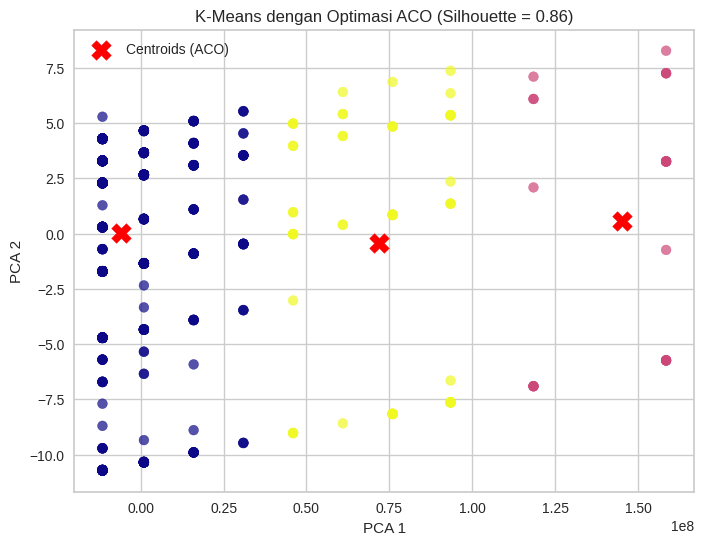

In [95]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

# --- Transformasi centroid hasil ACO ke ruang PCA ---
centroids_aco_pca = pca.transform(kmeans_aco.cluster_centers_)

# --- Visualisasi ---
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_aco, cmap='plasma', s=50, alpha=0.7)

# Plot centroid
plt.scatter(
    centroids_aco_pca[:, 0],
    centroids_aco_pca[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroids (ACO)'
)

plt.title(f"K-Means dengan Optimasi ACO (Silhouette = {silhouette_aco:.2f})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [96]:
print("Silhouette Coefficient for K-Means:", silhouette_kmeans)
print("Silhouette Coefficient for K-Means + ACO:", silhouette_aco)

Silhouette Coefficient for K-Means: 0.8052053996781583
Silhouette Coefficient for K-Means + ACO: 0.8626160706550491


#k-MEANS&ACO (n_cluster=4)

In [97]:
# Jalankan K-Means biasa dan simpan centroidnya
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_final)
labels = kmeans.labels_
silhouette_kmeans = silhouette_score(df_final, kmeans.labels_)
kmeans_centroids = kmeans.cluster_centers_
kmeans_centroids


array([[ 8.17649610e+06,  1.06166522e+01,  1.63573287e+00,
         1.36860364e+00,  7.29401561e-01,  8.02254987e-01,
         3.03555941e-02,  6.67823070e-02,  1.68256722e-01,
         2.69731136e-01,  2.77536860e-01,  6.21856028e-01,
         7.45880312e-01,  1.22818422e-15],
       [ 1.03550000e+08,  7.34000000e+00,  2.06000000e+00,
         1.38000000e+00,  4.60000000e-01,  8.20000000e-01,
         1.20000000e-01,  1.60000000e-01,  2.80000000e-01,
         5.40000000e-01,  4.40000000e-01,  3.80000000e-01,
         7.00000000e-01,  1.00000000e+00],
       [ 4.00641026e+07,  9.70085470e+00,  1.64102564e+00,
         1.64957265e+00,  7.94871795e-01,  7.09401709e-01,
         4.27350427e-02,  8.54700855e-02,  2.73504274e-01,
         3.07692308e-01,  2.82051282e-01,  6.23931624e-01,
         5.98290598e-01, -7.63278329e-17],
       [ 1.75000000e+08,  7.00000000e+00,  1.75000000e+00,
         1.25000000e+00,  3.12500000e-01,  6.87500000e-01,
         1.25000000e-01,  1.25000000e-01,  2.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


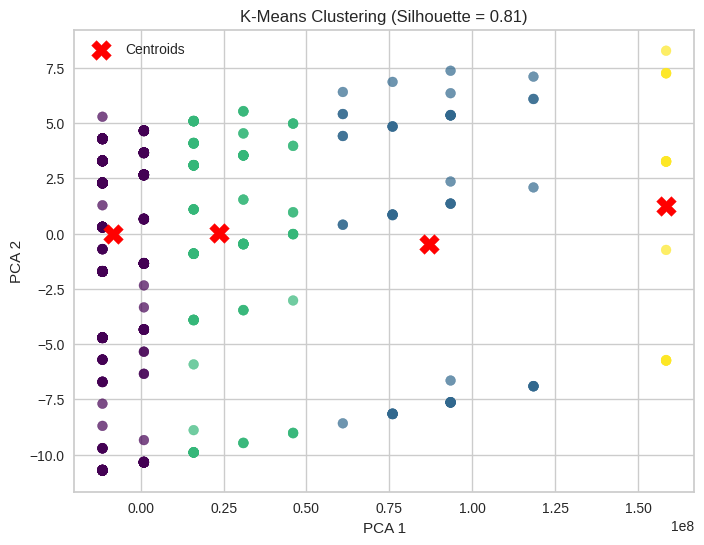

In [98]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

# --- Visualisasi cluster ---
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

# --- Visualisasi centroid (turunkan ke PCA juga) ---
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title(f"K-Means Clustering (Silhouette = {silhouette_kmeans:.2f})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [99]:
class AntColonyOptimization:
    def __init__(self, data, n_clusters= 4, n_ants=50, n_iterations=100,
                 alpha=1, beta=2, evaporation_rate=0.8):
        self.data = data
        self.n_clusters = n_clusters
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha  # pengaruh pheromone
        self.beta = beta    # pengaruh heuristic (jarak)
        self.evaporation_rate = evaporation_rate
        self.pheromone = np.ones((len(data), n_clusters))

    # ==========================================================
    # 🔹 Fungsi utama optimasi
    # ==========================================================
    def optimize(self):
        best_centroids = None
        best_score = -1

        for iteration in range(self.n_iterations):
            all_centroids = []
            all_scores = []

            # 🐜 Tiap semut membentuk solusi sendiri
            for _ in range(self.n_ants):
                centroids = self.select_centroids_probabilistic()
                score = self.evaluate_centroids(centroids)
                all_centroids.append(centroids)
                all_scores.append(score)

                if score > best_score:
                    best_centroids = centroids
                    best_score = score

            # 💧 Update pheromone berdasarkan semua semut
            self.update_pheromone_batch(all_centroids, all_scores)

            # (Opsional) tampilkan progres di notebook
            if (iteration + 1) % 10 == 0:
                print(f"Iterasi {iteration+1}/{self.n_iterations} | Skor terbaik: {best_score:.4f}")

        print(f"✅ Optimasi selesai! Silhouette terbaik: {best_score:.4f}")
        return best_centroids

    # ==========================================================
    # 🔹 Pemilihan centroid secara probabilistik (pheromone + jarak)
    # ==========================================================
    def select_centroids_probabilistic(self):
        centroids = []
        remaining_indices = list(range(len(self.data)))

        for cluster_idx in range(self.n_clusters):
            pheromone_values = self.pheromone[remaining_indices, cluster_idx]
            distances = np.ones(len(remaining_indices))

            # heuristic: titik yang lebih jauh punya peluang lebih besar
            if centroids:
                prev_centroids = np.array(centroids)
                distances = cdist(self.data.iloc[remaining_indices].values, prev_centroids).min(axis=1)
            heuristic = 1 / (distances + 1e-6)

            # probabilitas berdasarkan pheromone dan heuristic
            probs = (pheromone_values ** self.alpha) * (heuristic ** self.beta)
            probs /= probs.sum()

            chosen_index = np.random.choice(remaining_indices, p=probs)
            centroids.append(self.data.iloc[chosen_index].values)
            remaining_indices.remove(chosen_index)

        return np.array(centroids)

    # ==========================================================
    # 🔹 Evaluasi centroid menggunakan silhouette score
    # ==========================================================
    def evaluate_centroids(self, centroids):
        try:
            kmeans = KMeans(n_clusters=self.n_clusters, init=centroids, n_init=1,
                            max_iter=300, random_state=42)
            kmeans.fit(self.data)
            if len(set(kmeans.labels_)) > 1:
                return silhouette_score(self.data, kmeans.labels_)
            else:
                return -1
        except Exception:
            return -1

    # ==========================================================
    # 🔹 Update pheromone dari semua semut
    # ==========================================================
    def update_pheromone_batch(self, all_centroids, all_scores):
        # Evaporasi pheromone lama
        self.pheromone *= (1 - self.evaporation_rate)

        # Tambahkan pheromone baru berdasarkan skor semut
        for centroids, score in zip(all_centroids, all_scores):
            if score > 0:
                for i, centroid in enumerate(centroids):
                    distances = np.linalg.norm(self.data.values - centroid, axis=1)
                    delta_pheromone = score / (distances + 1e-6)
                    self.pheromone[:, i] += delta_pheromone

        # Hindari nilai ekstrem
        self.pheromone = np.clip(self.pheromone, 1e-6, None)
aco = AntColonyOptimization(df_final) # Ensure n_clusters is passed
optimal_centroids = aco.optimize()

Iterasi 10/100 | Skor terbaik: 0.8810
Iterasi 20/100 | Skor terbaik: 0.8810
Iterasi 30/100 | Skor terbaik: 0.8810
Iterasi 40/100 | Skor terbaik: 0.8810
Iterasi 50/100 | Skor terbaik: 0.8810
Iterasi 60/100 | Skor terbaik: 0.8810
Iterasi 70/100 | Skor terbaik: 0.8810
Iterasi 80/100 | Skor terbaik: 0.8810
Iterasi 90/100 | Skor terbaik: 0.8810
Iterasi 100/100 | Skor terbaik: 0.8810
✅ Optimasi selesai! Silhouette terbaik: 0.8810


In [100]:
kmeans_aco = KMeans(n_clusters=4, init=optimal_centroids, n_init=1, max_iter=300)
kmeans_aco.fit(df_final)
silhouette_aco = silhouette_score(df_final, kmeans_aco.labels_)
kmeans_aco_centroids = kmeans_aco.cluster_centers_
kmeans_aco_centroids

array([[ 2.04918033e+07,  1.01174863e+01,  1.63661202e+00,
         1.46448087e+00,  8.22404372e-01,  7.48633880e-01,
         3.00546448e-02,  1.01092896e-01,  2.34972678e-01,
         3.22404372e-01,  2.81420765e-01,  6.22950820e-01,
         6.74863388e-01, -2.63677968e-16],
       [ 1.38837209e+08,  6.81395349e+00,  1.83720930e+00,
         1.37209302e+00,  3.48837209e-01,  7.67441860e-01,
         1.39534884e-01,  1.16279070e-01,  2.79069767e-01,
         4.18604651e-01,  4.88372093e-01,  4.88372093e-01,
         6.51162791e-01,  1.00000000e+00],
       [ 6.45149254e+07,  8.97014925e+00,  1.97014925e+00,
         1.52238806e+00,  6.56716418e-01,  7.01492537e-01,
         5.97014925e-02,  1.49253731e-01,  2.83582090e-01,
         3.88059701e-01,  2.98507463e-01,  5.82089552e-01,
         6.11940299e-01,  3.43283582e-01],
       [ 5.00000000e+06,  1.07651163e+01,  1.62674419e+00,
         1.35232558e+00,  7.00000000e-01,  8.20930233e-01,
         3.13953488e-02,  5.23255814e-02,  1.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


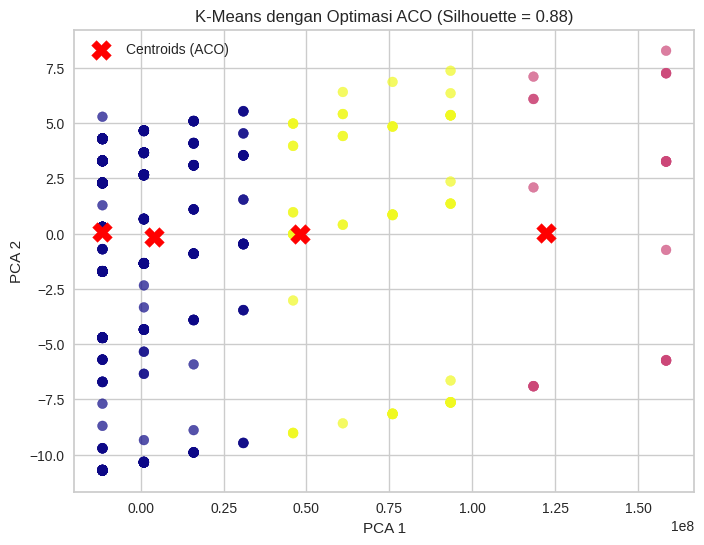

In [101]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

# --- Transformasi centroid hasil ACO ke ruang PCA ---
centroids_aco_pca = pca.transform(kmeans_aco.cluster_centers_)

# --- Visualisasi ---
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_aco, cmap='plasma', s=50, alpha=0.7)

# Plot centroid
plt.scatter(
    centroids_aco_pca[:, 0],
    centroids_aco_pca[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroids (ACO)'
)

plt.title(f"K-Means dengan Optimasi ACO (Silhouette = {silhouette_aco:.2f})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [102]:
print("Silhouette Coefficient for K-Means:", silhouette_kmeans)
print("Silhouette Coefficient for K-Means + ACO:", silhouette_aco)

Silhouette Coefficient for K-Means: 0.8055818878923299
Silhouette Coefficient for K-Means + ACO: 0.8810042075360549


#Grafik Perbandingan

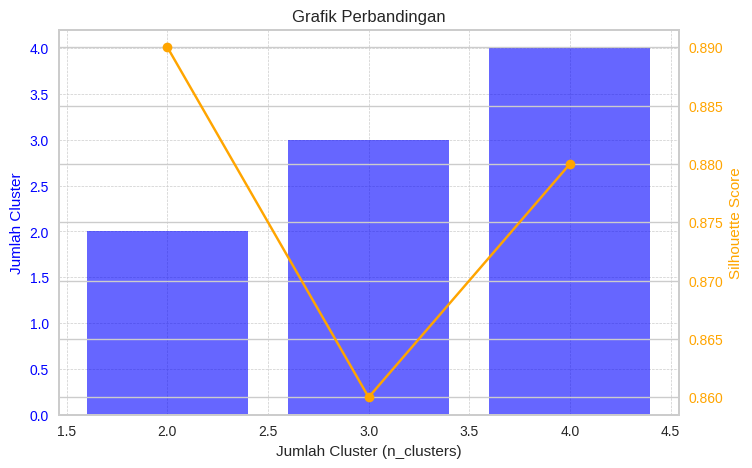

In [103]:
n_clusters = [2, 3, 4]
jumlah_cluster = [2,3,4]
silhouette_aco = [0.89, 0.86, 0.88]  # Ganti dengan nilai asli

fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot batang untuk jumlah cluster
ax1.bar(n_clusters, jumlah_cluster, color='blue', alpha=0.6, label="Jumlah Cluster")
ax1.set_xlabel("Jumlah Cluster (n_clusters)")
ax1.set_ylabel("Jumlah Cluster", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Buat sumbu Y kedua untuk silhouette score
ax2 = ax1.twinx()
ax2.plot(n_clusters, silhouette_aco, marker='o', linestyle='-', color='orange', label="Silhouette Score")
ax2.set_ylabel("Silhouette Score", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Tambahkan judul dan grid
plt.title("Grafik Perbandingan")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Tampilkan plot
plt.show()

## **Save Dataset Preprocessing**

In [104]:
# # Save the DataFrame to a CSV file
# df_final.to_csv('df_final.csv', index=False)

# # Download the file
# from google.colab import files
# files.download('df_final.csv')